<a href="https://colab.research.google.com/github/Awanieva/Team-InsightHub/blob/main/Cereal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis on 80 Cereal Products by Insight Hub Team**

# **importing Libraries**

In [933]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Data**

In [934]:
cereal=pd.read_csv("cereal.csv")

# **Understanding Data set**

In [935]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [936]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [937]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [938]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


# **Data Cleaning**

In [939]:
# Replace the manufacturers initials with the Manufacturers full name in the mfr column
cereal["mfr"] = cereal["mfr"].replace(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], ['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina', 'General Mills', 'Post', 'American Home Food Products'])

In [940]:
# Check for missing values
print(cereal.isna().sum())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [941]:
print(cereal[cereal.select_dtypes(exclude='object')<0].count())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [942]:
cereal.replace({'carbo':-1.0, 'sugars':-1, 'potass':-1}, 0, inplace=True)
print(cereal[cereal.select_dtypes(exclude='object')<0].count())


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


# **Exploratory Data Analysis**

<bound method Figure.tight_layout of <Figure size 1600x1200 with 12 Axes>>

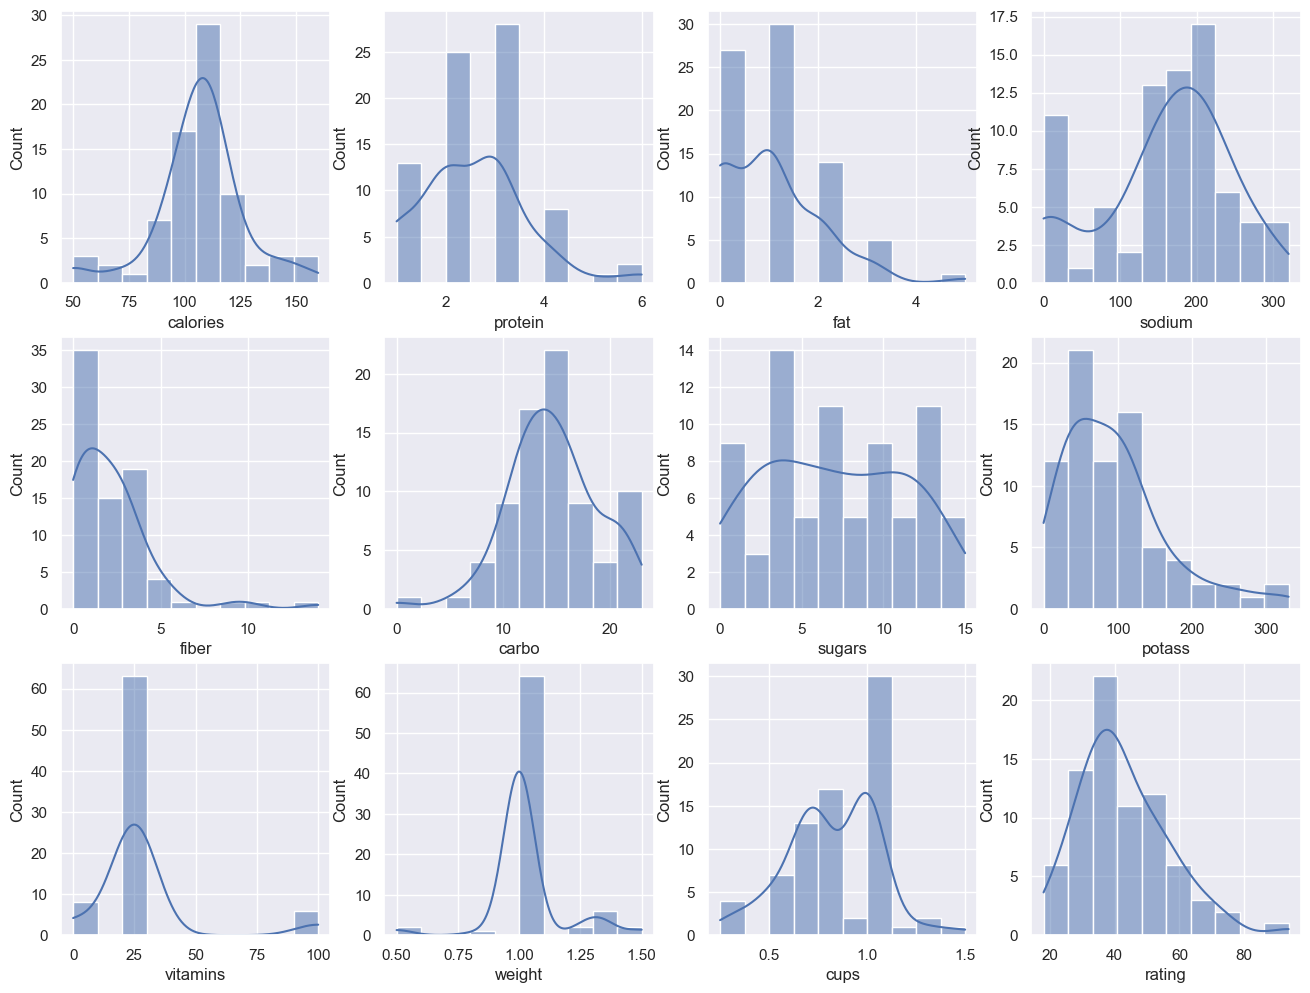

In [943]:
# Let's explore the distribution of each of the variables particularly the numerical variables
# For reusability, let's define a function for the distribution plot
fig,axs = plt.subplots(3,4, figsize = (16, 12))
def distribution_plot(variable_name, a,b, df = cereal):
  sns.set(style="darkgrid")
  sns.histplot(data=df, x= variable_name, kde= True, bins = 10, ax = axs[a,b])
  # plt.title(f'Distribution of {variable_name}')
  plt.xlabel(variable_name)

# distribution plot of the dataset
distribution_plot("calories", 0, 0)
distribution_plot("protein", 0, 1)
distribution_plot("fat", 0, 2)
distribution_plot("sodium", 0, 3)
distribution_plot("fiber", 1, 0)
distribution_plot("carbo", 1, 1)
distribution_plot("sugars", 1, 2)
distribution_plot("potass", 1, 3)
distribution_plot("vitamins", 2, 0)
distribution_plot("weight", 2, 1)
distribution_plot("cups", 2, 2)
distribution_plot("rating", 2, 3)
fig.tight_layout

From the above visualization, below are some brief details of nutrients based on numerical value frequency
1. calories: more than 30 of the products are ranging from 100-120 calories
2. protein: over 50 products have a protein content ranging from 2-3
3. fat: over 55 products have a fat content ranging from 0-2
4. sodium: more than 44 products have a sodium content ranging from 150-200
5. fiber: about 35 products have a fiber content from 0-2
6. carbo: More than 50 products contain carbohydrate of 12-18
7. sugars: more than 15 products have a suagr content of 2-3 and about 12 products having a sugar content of 12-13
8. potass: more than 48 of the products have a potass content of 0-100 range
9: vitamins: about 50 products have a vitamin content of 20-30



### Determine the correlation of the dataset

<Axes: >

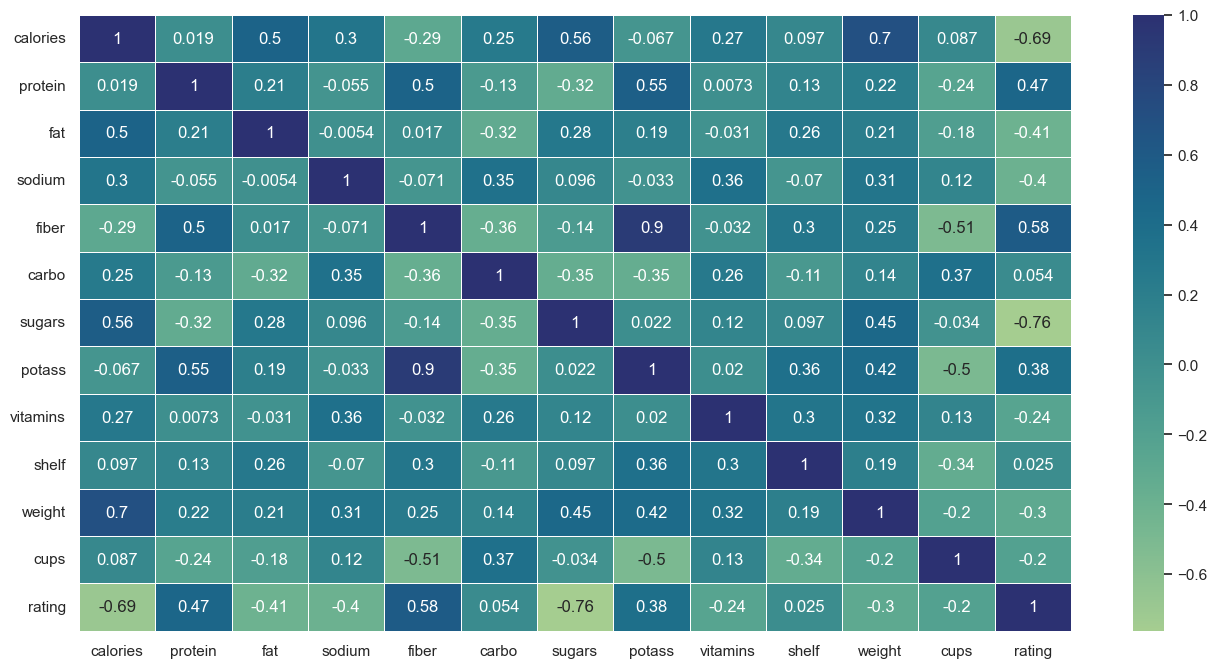

In [944]:
cereal_corr = cereal.drop(['name', 'mfr', 'type'], axis = 1)
corr_matrix = cereal_corr.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="crest")

From the above Correlation of colunms, below are some observation
1. The highest correlation seen is 0.9 which is between fiber and Potass
2. other correlation ranging from 0.5-0.7 are seen in calories and weight, rating and fiber, carbo and rating, calories and fat, calories and sugar, protein and fiber and protein and potass.
3. The shelf column has little to no correlation with the rating.

<Axes: >

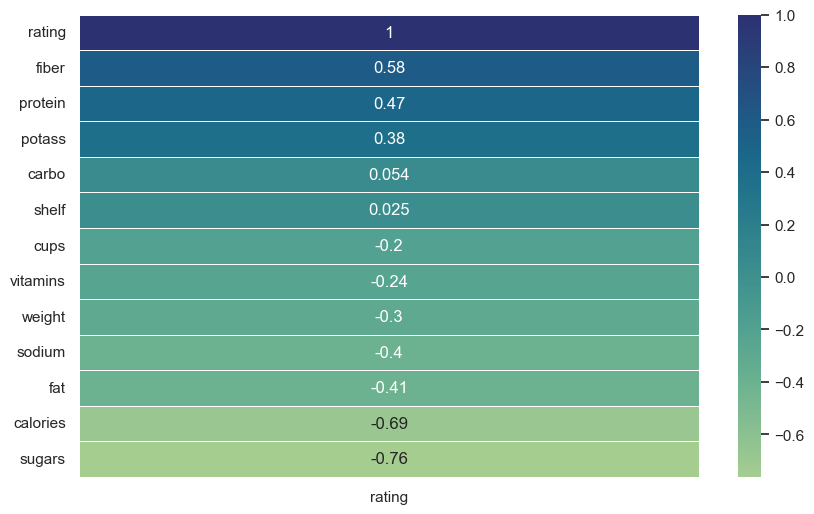

In [945]:
#checking the columns that Corr more with the Rating Column
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['rating']].sort_values(by='rating', ascending=False), annot=True, linewidth=.5, cmap="crest")

From the above visualization, we can see that fiber has the highest correlation with rating while suagrs has the Lowest correlation with rating.

### Top 10 Cereals With Most Sugar Content

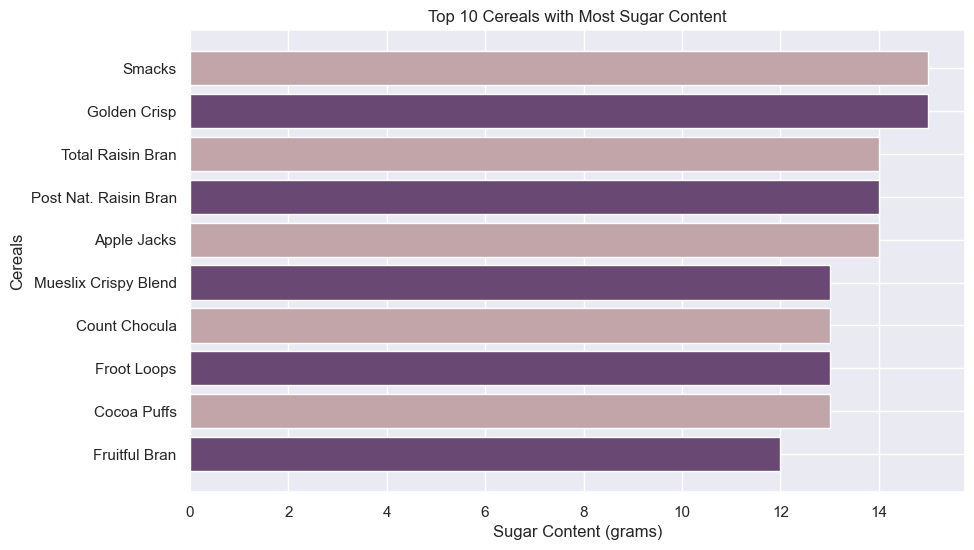

In [946]:
sugar_highest = cereal[['name', 'sugars']].sort_values(by='sugars', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(sugar_highest['name'], sugar_highest['sugars'], color=['#C1A5A9', '#694873'])
plt.title("Top 10 Cereals with Most Sugar Content")
plt.xlabel("Sugar Content (grams)")
plt.ylabel('Cereals')
plt.gca().invert_yaxis()
plt.show()

From the above visualization, it was observed that
1. smacks and golden crisp are having the highest sugar content.
2. And 3 more products (Total Raisin Bran, Post Nat. Raisin Bran, and Apple Jacks) had higher sugar content.

### Cereals with the least sugar content

In [947]:
#cereals with the Lowest Sugar Content
w_o_sugar = cereal.loc[cereal['sugars'] == 0, ['name']]
print(w_o_sugar['name'])

3     All-Bran with Extra Fiber
20       Cream of Wheat (Quick)
54                  Puffed Rice
55                 Puffed Wheat
57               Quaker Oatmeal
63               Shredded Wheat
64       Shredded Wheat 'n'Bran
65    Shredded Wheat spoon size
Name: name, dtype: object


### Visualisation of the Average Sugar Content by Each Manufacturer

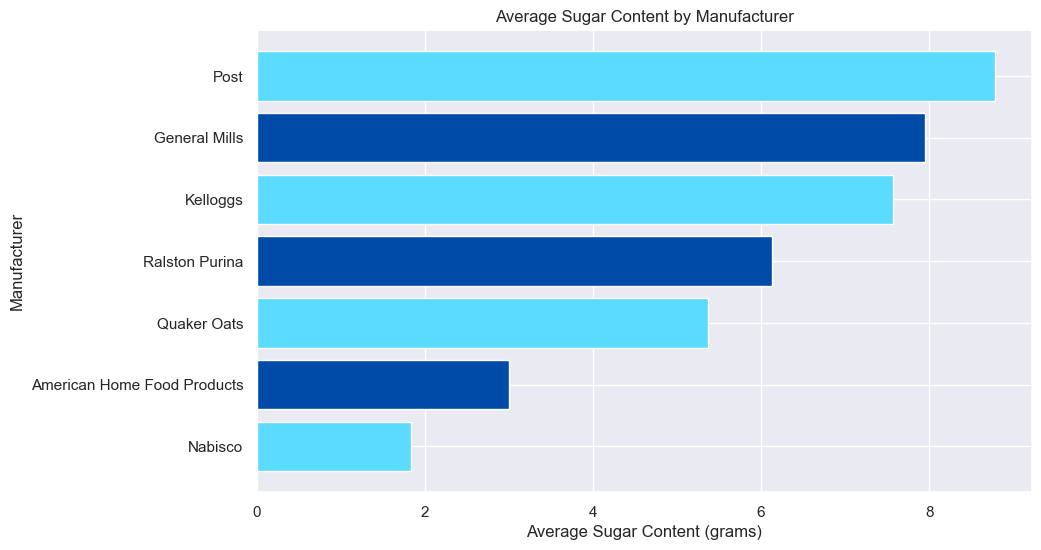

In [948]:
#Creating a Barh for average sugar content based on Manufacturer
mfr_sugar = cereal.groupby('mfr')['sugars'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(mfr_sugar.index, mfr_sugar, color=['#5ADBFF', '#004BA8'])
plt.title("Average Sugar Content by Manufacturer")
plt.xlabel("Average Sugar Content (grams)")
plt.ylabel("Manufacturer")
plt.show()

from the above visualization, it is Observed that
1. P(Post) manufacturer cereal products has the Highest Sugar content when compared the other Products.
2. N(Nabisco) manufacturer cereal products has the lowest Sugar content when compared to other products.

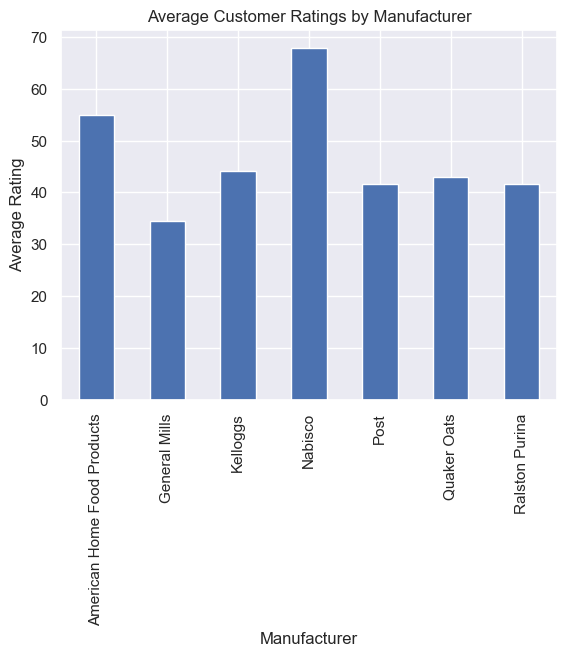

In [949]:
avg_ratings = cereal.groupby('mfr')['rating'].mean()
avg_ratings.plot(kind='bar')
plt.title('Average Customer Ratings by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()


From th above Visualization, the following was Observed
1. N and A (Nabisco and American Home Food Products) have the highest customer rating
2. G (General Mills) has the lowest customer rating

### Visualisation of Customers ratings

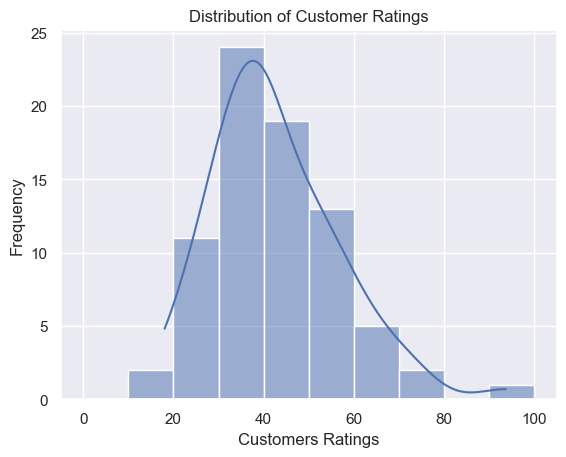

In [950]:
#Creating a Hist of the Frequency of Customer Raings
_ = sns.histplot(data=cereal, x='rating', bins=10, binrange=(0,100), kde=True)\
    .set(title='Distribution of Customer Ratings')
plt.xlabel('Customers Ratings')
plt.ylabel('Frequency')
plt.show()

### Visualisation of the manufacturers frequency

In [951]:
# Define a countplot function
def display_count(data, x, label, title):
    """ Display a countplot

    Args:
        data(var): A dataframe.
        x(str): The column in the dataframe that it's count needs to be displayed.
        label(str): The label of the x-axis.
        title(str): The plot's title.
    
    Returns:
        A plot
    """    
    sns.countplot(data=data, x=x)
    plt.xlabel(label)
    plt.xticks(rotation=45)
    plt.title(title)
    return plt.show()

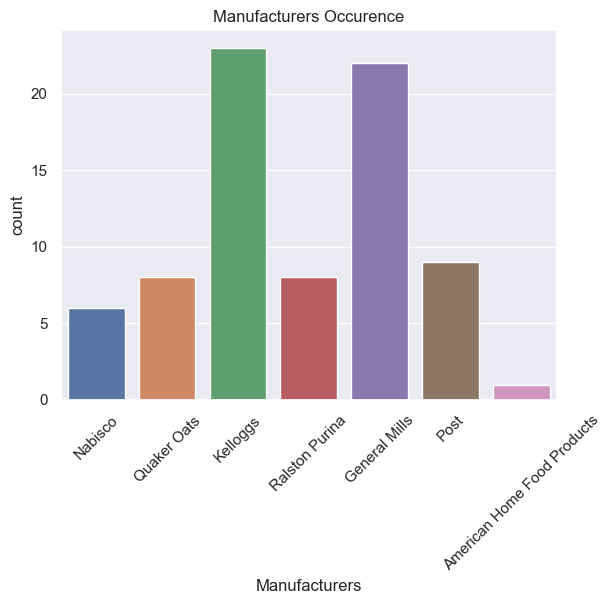

In [952]:
# Display a countplot on manufacturers
display_count(data=cereal, x='mfr', label='Manufacturers', title='Manufacturers Occurence')

From the above visualization it is oberved that kellogs and General Mills has the highest number of products in the data set while American Home food Products and Nabisco has the lowest number of products.

### Classification of Cereals Based on Nutritional Content for a Category of Persons

In [953]:
cereal.loc[cereal['sugars']<=5,'category']='Children'
cereal.loc[cereal['calories']<=100,'category']='Baby'
cereal.loc[cereal['protein']>=5,'category']='Pregnant Women'
cereal.loc[~cereal['category'].isin(['Baby', 'Children', 'Pregnant Women']), 'category']='Adult'

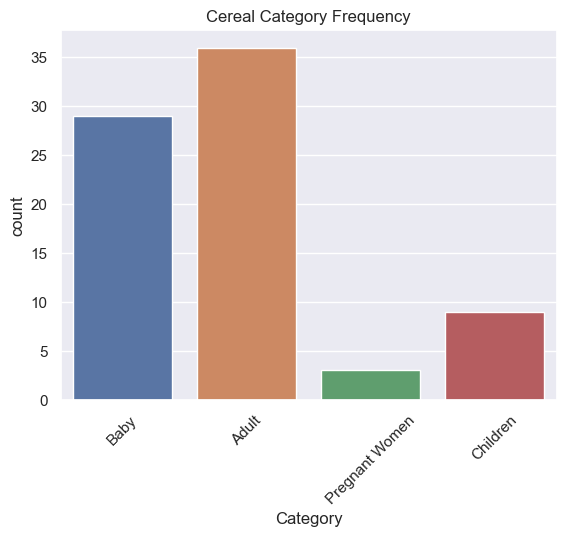

In [954]:
# Display a countplot of category column
display_count(data=cereal, x='category', label='Category', title='Cereal Category Frequency')

In [955]:
def pie_chart(data, title):
    """Display a pie chart

    Args:
        data(var): Must be a pandas series.
        title(str): Plot title. Must be a string.

    Returns:
        A pie chart
    """
    plt.figure(figsize=(15, 10))
    plt.pie(data, labels=data.index, labeldistance=1.05, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize=30)
    plt.axis('equal')
    return plt.show()

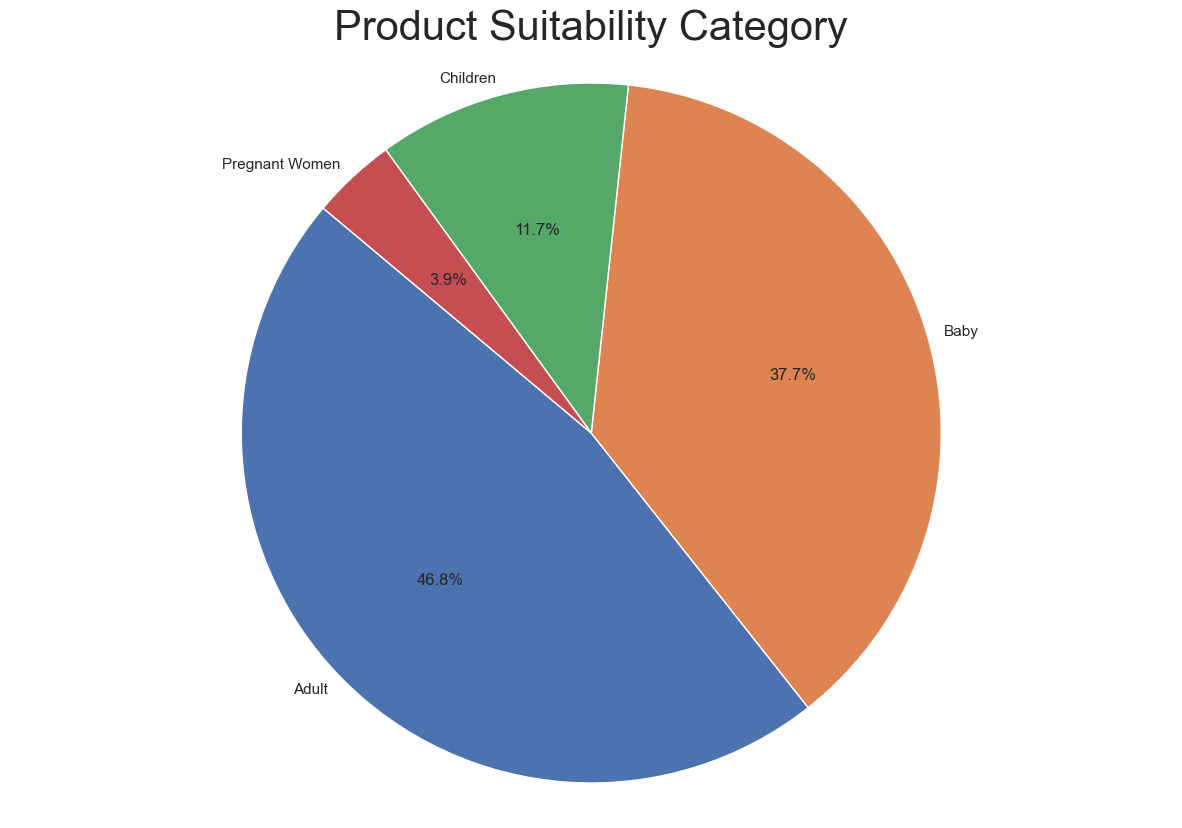

In [956]:
# Display a pie chart of category count
category_counts = cereal["category"].value_counts()
pie_chart(category_counts, 'Product Suitability Category')

From the above visualization it is oberved that
1. Adults and Babies have the highest number of products suitable for thier consumption with 46.8% and 37.7% repectively.
2. Pregnant women had the number of products suitable for thier consumption with 3.9%.

# Sugar and Fiber Product Content Classification

In [957]:
#Classifying Cereals Based On Their Sugar and Fiber Content
high_sugar_threshold=9
low_fiber_threshold=3

cereal.loc[cereal['sugars'] > high_sugar_threshold,'group']='high_sugar(diabetes_risk)'
cereal.loc[cereal['fiber'] < low_fiber_threshold,'group']='low_fiber(health_risk)'
cereal.loc[(cereal['sugars'] <= high_sugar_threshold) & (cereal['fiber']>=low_fiber_threshold),'group']='moderate'


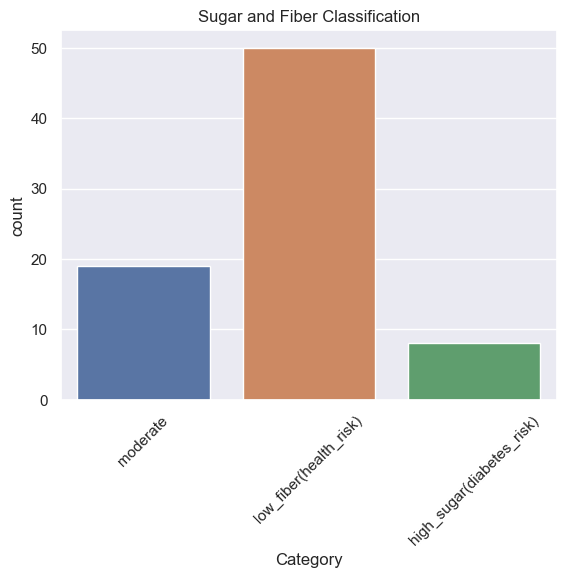

In [958]:
# Display a countplot of category
display_count(cereal, 'group', 'Category', 'Sugar and Fiber Classification')

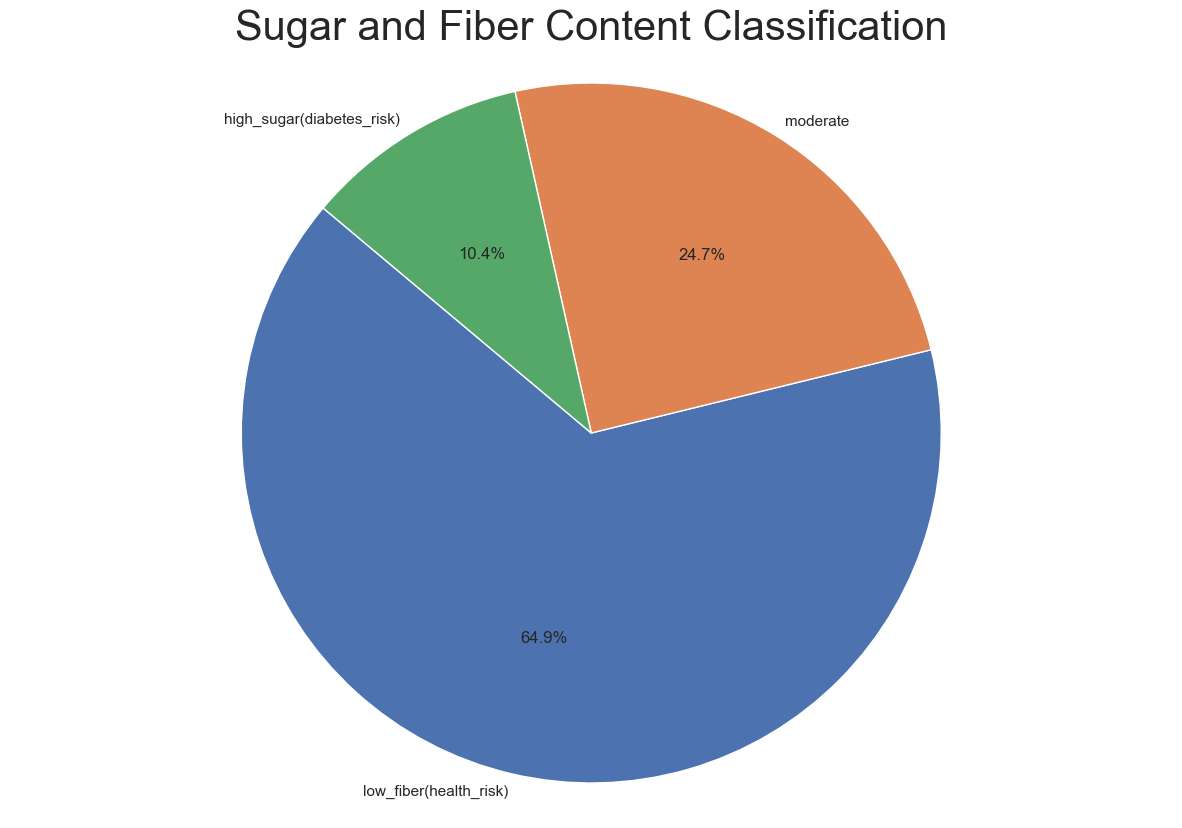

In [959]:
# Display pie chart of group count
counts_sugarfiber = cereal["group"].value_counts()
pie_chart(counts_sugarfiber, 'Sugar and Fiber Content Classification')

From the above visualization it is oberved that
1. Low Fiber(Health Risk) has the highest number of products in the data set with 64.9% which shows half of the products has low fiber content.
2. High sugar(Diabetes Risk) has the lowest number of products in the data set with 10.4%.

# Categorizing The Cereals As Cold Or Hot Cereal Types

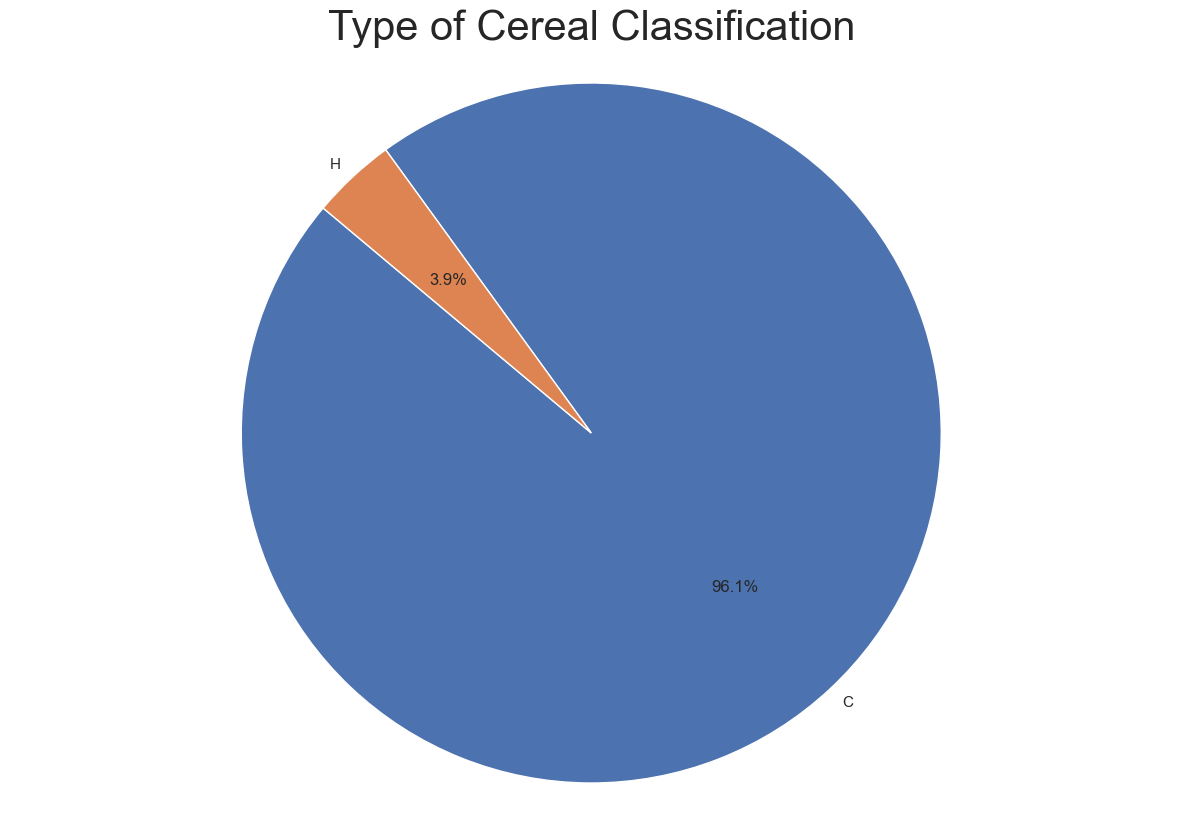

In [960]:
# Display pie chart of type count
counts_type = cereal["type"].value_counts()
pie_chart(counts_type, 'Type of Cereal Classification')

From the above visualization it is oberved that
1. H(Hot) served cereals has the lowest number of products in the data set with 3.9%.
2. C(Cold) served cereals has the highest number of products in the data set with 96.1%.

### Categorizing Cereals Based On Customer Ratings

In [961]:
#categorizing cerals based on their ratings
bins = [0, 20, 40, 60, 80, 100]
labels =  ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
cereal['rating_category'] = pd.cut(cereal['rating'], labels=labels, bins=bins)

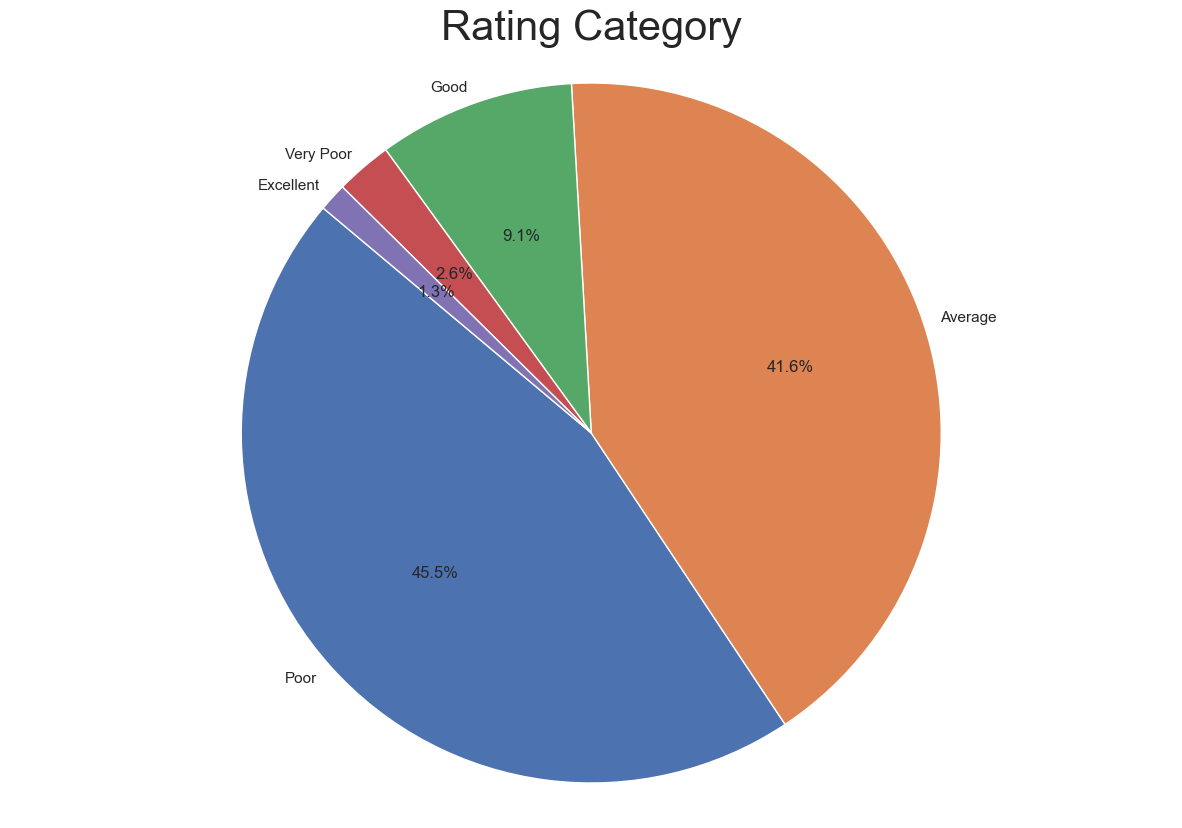

In [962]:
# Display a pie chart of rating_category
counts_ratingc = cereal["rating_category"].value_counts()
pie_chart(counts_ratingc, 'Rating Category')